# K-Means Clustering for Bank Fraud Detection

**Author:** Marco Antonio García Sánchez  
**Objective:** Explore and analyze credit card transaction data using unsupervised clustering techniques to identify patterns and potential fraud indicators through K-Means clustering.  
**Dataset:** [Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud) – Contains **284,807 credit card transactions** with **492 fraudulent cases** (0.172% of total transactions).  

---

Original source / credit:
This notebook is based on the Udemy course: "Machine Learning y Data Science: Curso Completo con Python"

Instructor: Santiago Hernández – Expert in Cybersecurity and Artificial Intelligence
Website: techmind.ac
Course URL: udemy.com/course/machine-learning-desde-cero/learn/lecture/19203700

---

This notebook is developed as part of my **Data Science and Machine Learning portfolio**, demonstrating an **unsupervised learning approach** to fraud detection:  
- Exploratory data analysis and feature selection.  
- K-Means clustering in 2D, 3D, and high-dimensional spaces.  
- Cluster evaluation and interpretation.  
- Analysis of fraud patterns through clustering results.  

**Dataset Characteristics:**  
- **Features V1-V28**: Principal components obtained through PCA transformation (for confidentiality).  
- **Time**: Seconds elapsed between each transaction and the first transaction.  
- **Amount**: Transaction amount in euros.  
- **Class**: Target variable (0 = legitimate, 1 = fraudulent).  

---

## Methodology

### 1. **Data Exploration and Feature Selection**
- **Density analysis** of each feature to identify discriminative variables.  
- **Visual separation assessment** between legitimate and fraudulent transactions.  
- **Selection of optimal features** (V10, V14, V11) based on class separation.  

### 2. **Preprocessing and Data Preparation**
- **Removal of non-discriminative features** (Time, Amount) that don't contribute to fraud detection.  
- **Justification for minimal preprocessing** due to PCA-transformed features.  
- **Dataset preparation** for clustering analysis.  

### 3. **Clustering Implementation**
- **K-Means clustering** in multiple dimensional spaces:
  - **2D clustering** using V10 and V14 features.  
  - **3D clustering** using V10, V14, and V11 features.  
  - **High-dimensional clustering** using all available features.  

### 4. **Cluster Optimization**
- **Elbow method** for optimal number of clusters (k) selection.  
- **Inertia analysis** to determine cluster compactness.  
- **Multiple k values** testing for different dimensional spaces.  

### 5. **Cluster Evaluation and Analysis**
- **Purity score** calculation to measure cluster quality against true labels.  
- **Silhouette coefficient** for unsupervised cluster validation.  
- **Calinski-Harabasz index** for cluster separation assessment.  
- **Fraud concentration analysis** within identified clusters.  

### 6. **Visualization and Interpretation**
- **2D and 3D scatter plots** showing cluster boundaries and centroids.  
- **Decision boundary visualization** for cluster separation.  
- **Cluster composition analysis** (legitimate vs fraudulent samples).  
- **Pattern identification** in fraud distribution across clusters.  

### 7. **Results and Insights**
- **Cluster quality assessment** using multiple evaluation metrics.  
- **Fraud pattern identification** through cluster analysis.  
- **Feature importance** understanding through clustering results.  
- **Business insights** for fraud detection strategies.  

---

This notebook demonstrates how **unsupervised clustering techniques** can provide valuable insights into fraud patterns, even in highly imbalanced datasets, and serves as a foundation for more advanced fraud detection systems.

##  Exploratory Clustering vs Supervised Classification

In this project, we combine **exploratory clustering** and **supervised classification** to understand and predict fraudulent transactions.  

#### Clustering (Unsupervised)

- Clustering algorithms (e.g., KMeans) **group data points based on similarity** in their features.  
- It is **exploratory**: no class labels are used, and clusters do not inherently represent “fraud” or “legit” classes.  
- Useful for:
  - Detecting **patterns, subgroups, or anomalies** in the data.
  - Identifying potential **outliers**.
  - Creating **visual examples** in 2D and 3D to understand the structure of the dataset.
- Example: transactions that share similar behavior might naturally form a cluster, even without knowing whether they are fraudulent.  

#### Classification (Supervised)

- Supervised classification algorithms **use labeled data** (e.g., `Class = 0 or 1`) to predict outcomes.  
- Clustering can be **combined with supervised models** to improve performance:
  - Cluster IDs can be used as **new features** for classification.
  - Helps identify **subgroups within classes**, e.g., different types of fraudulent behavior.
- Classification allows us to **predict directly whether a transaction is fraudulent**.  

#### Summary

| Aspect | Clustering (Unsupervised) | Classification (Supervised) |
|--------|---------------------------|----------------------------|
| Labels | Not used | Required |
| Objective | Discover patterns / groups | Predict class labels |
| Output | Groups of similar data | Predicted label per data point |
| Use case in fraud detection | Exploration, feature creation, anomaly detection | Direct fraud detection |

> In short: Clustering is a **tool for exploration and understanding patterns**, while classification is **used to make predictions**. When labels are available, clustering still adds value by providing additional insights and features for supervised learning.

## Problem Description  

The dataset contains credit card transactions made by European cardholders in September 2013. It includes only two days of transactions, with **492 frauds out of 284,807 operations**. This makes the dataset **highly imbalanced**, since the positive class (fraud) represents only **0.172% of all transactions**.  

The dataset consists exclusively of **numerical variables** that are the result of a **Principal Component Analysis (PCA) transformation**. Due to confidentiality issues, the original features cannot be provided.  
- Features **V1, V2, …, V28** are the principal components obtained with PCA.  
- The only variables not transformed by PCA are **`Time`** and **`Amount`**:  
  - Time: seconds elapsed between each transaction and the first transaction in the dataset.  
  - Amount: transaction amount, which can be useful for cost-sensitive learning approaches.  
- The target variable **Class** takes the value **1 for fraud** and **0 otherwise**.  

---

## Preprocessing Considerations  

1. **Descriptive statistics and visualizations**  
   Traditional descriptive statistics or visualizations are not very meaningful for features V1–V28, as they are not original measurements but **linear combinations of attributes** projected into a new space.  

2. **Additional PCA (PCA on PCA)**  
   Applying PCA again is unnecessary and redundant. The features are already **principal components**, which are optimized to capture variance while reducing dimensionality.  

3. **RFE (Recursive Feature Elimination)**  
   RFE is not appropriate here because it is designed to evaluate and select **original features with semantic meaning**, not PCA-generated components.  

4. **VIF (Variance Inflation Factor)**  
   VIF is typically used to detect multicollinearity among original variables. In this dataset, it is not required since PCA produces **orthogonal components**, which are by definition uncorrelated or minimally correlated.  

5. **Correlation analysis**  
   Similarly, correlation matrices do not provide significant insights for PCA-transformed features, as they are mathematically designed to be independent.  

---  

The dataset is almost ready for modeling. The only preprocessing step recommended is **scaling `Time` and `Amount`**, since they were not included in the PCA transformation.  

The real challenge lies in the **severe class imbalance**, which should be addressed through techniques such as:  
- Oversampling (e.g., SMOTE),  
- Undersampling, or  
- Using **class weights** in machine learning models.  

---

### Dataset Context and Challenges

#### **Class Imbalance Challenge**
- **Severe imbalance**: Only 0.172% of transactions are fraudulent (492 out of 284,807)
- **Impact on clustering**: K-Means is dominated by the majority class (legitimate transactions)
- **Visualization challenge**: Fraud patterns may be overshadowed by legitimate transaction patterns

#### **Feature Characteristics**
- **PCA-transformed features**: V1-V28 are already principal components (orthogonal, uncorrelated)
- **Untransformed features**: Time and Amount require special consideration
- **No missing values**: Dataset is clean and ready for analysis

#### **Clustering Considerations**
- **Distance-based algorithm**: K-Means relies on Euclidean distances
- **Scale sensitivity**: Features with different scales can distort clustering results
- **Optimal k selection**: Elbow method and inertia analysis for cluster number determination  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np

In [2]:
import warnings
# Ignoramos algunos warnings que se producen por invocar el modelo sin el nombre de las características
warnings.filterwarnings('ignore', category=UserWarning, message='.*X does not have valid feature names.*')

## 1.-Evaluation Functions

#### 1. plot_data
**Descripción:**  
- Dibuja los puntos de datos en 2D según sus etiquetas.  
- Permite comparar visualmente clusters con clases reales.  

#### 2. plot_centroids
**Descripción:**  
- Muestra los centroides de los clusters en un gráfico 2D.  
- Puede resaltar solo los centroides más relevantes si se usan pesos.  

#### 3. plot_decision_boundaries
**Descripción:**  
- Visualiza los límites de decisión de un modelo de clustering en 2D.  
- Combina los puntos de datos y los centroides para facilitar la interpretación visual.  

#### 4. purity_score
**Descripción:**  
- Evalúa la pureza de un clustering, midiendo qué porcentaje de cada cluster pertenece a la clase mayoritaria.  
- Solo se puede calcular si se tienen etiquetas verdaderas.  
- Útil como métrica inicial, aunque puede ser engañosa si hay clases muy desbalanceadas.

In [3]:
# Original code: https://bit.ly/2TNHBZ5
def plot_data(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, y, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, y)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## 2. Dataset Visualization

In [4]:
df = pd.read_csv("/Users/marco/Desktop/GitRepositorios/Datasets/kmeansTransactionsClustering/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))
df["Class"].value_counts()

Número de características: 31
Longitud del conjunto de datos: 284807


Class
0    284315
1       492
Name: count, dtype: int64

### Justification for Not Computing Descriptive Statistics or Checking Types/Nulls

In this dataset, all numerical features (V1 to V28) are **principal components obtained via PCA**, and the only untransformed columns are `Time` and `Amount`.  

Because of this:

1. **Descriptive statistics (`.describe()`) provide little meaningful information**  
   - The values of the principal components do not directly represent the original transaction magnitudes.  
   - Means, standard deviations, minima, and maxima of the components **have no direct interpretation** in terms of the original variables.  

2. **Checking types and missing values (`.info()`, `.isna().any()`) is redundant**  
   - All PCA columns are numeric.  
   - The dataset is already clean and contains no missing values.  

3. **Correlation is already addressed**  
   - PCA generates **orthogonal components**, so there is no linear correlation among the transformed variables.  
   - Creating correlation matrices or visualizations would not provide useful insights.  

**Conclusion:**  
Since the data is already projected and clean, traditional statistical explorations **do not make sense** and could be misleading in this analysis.

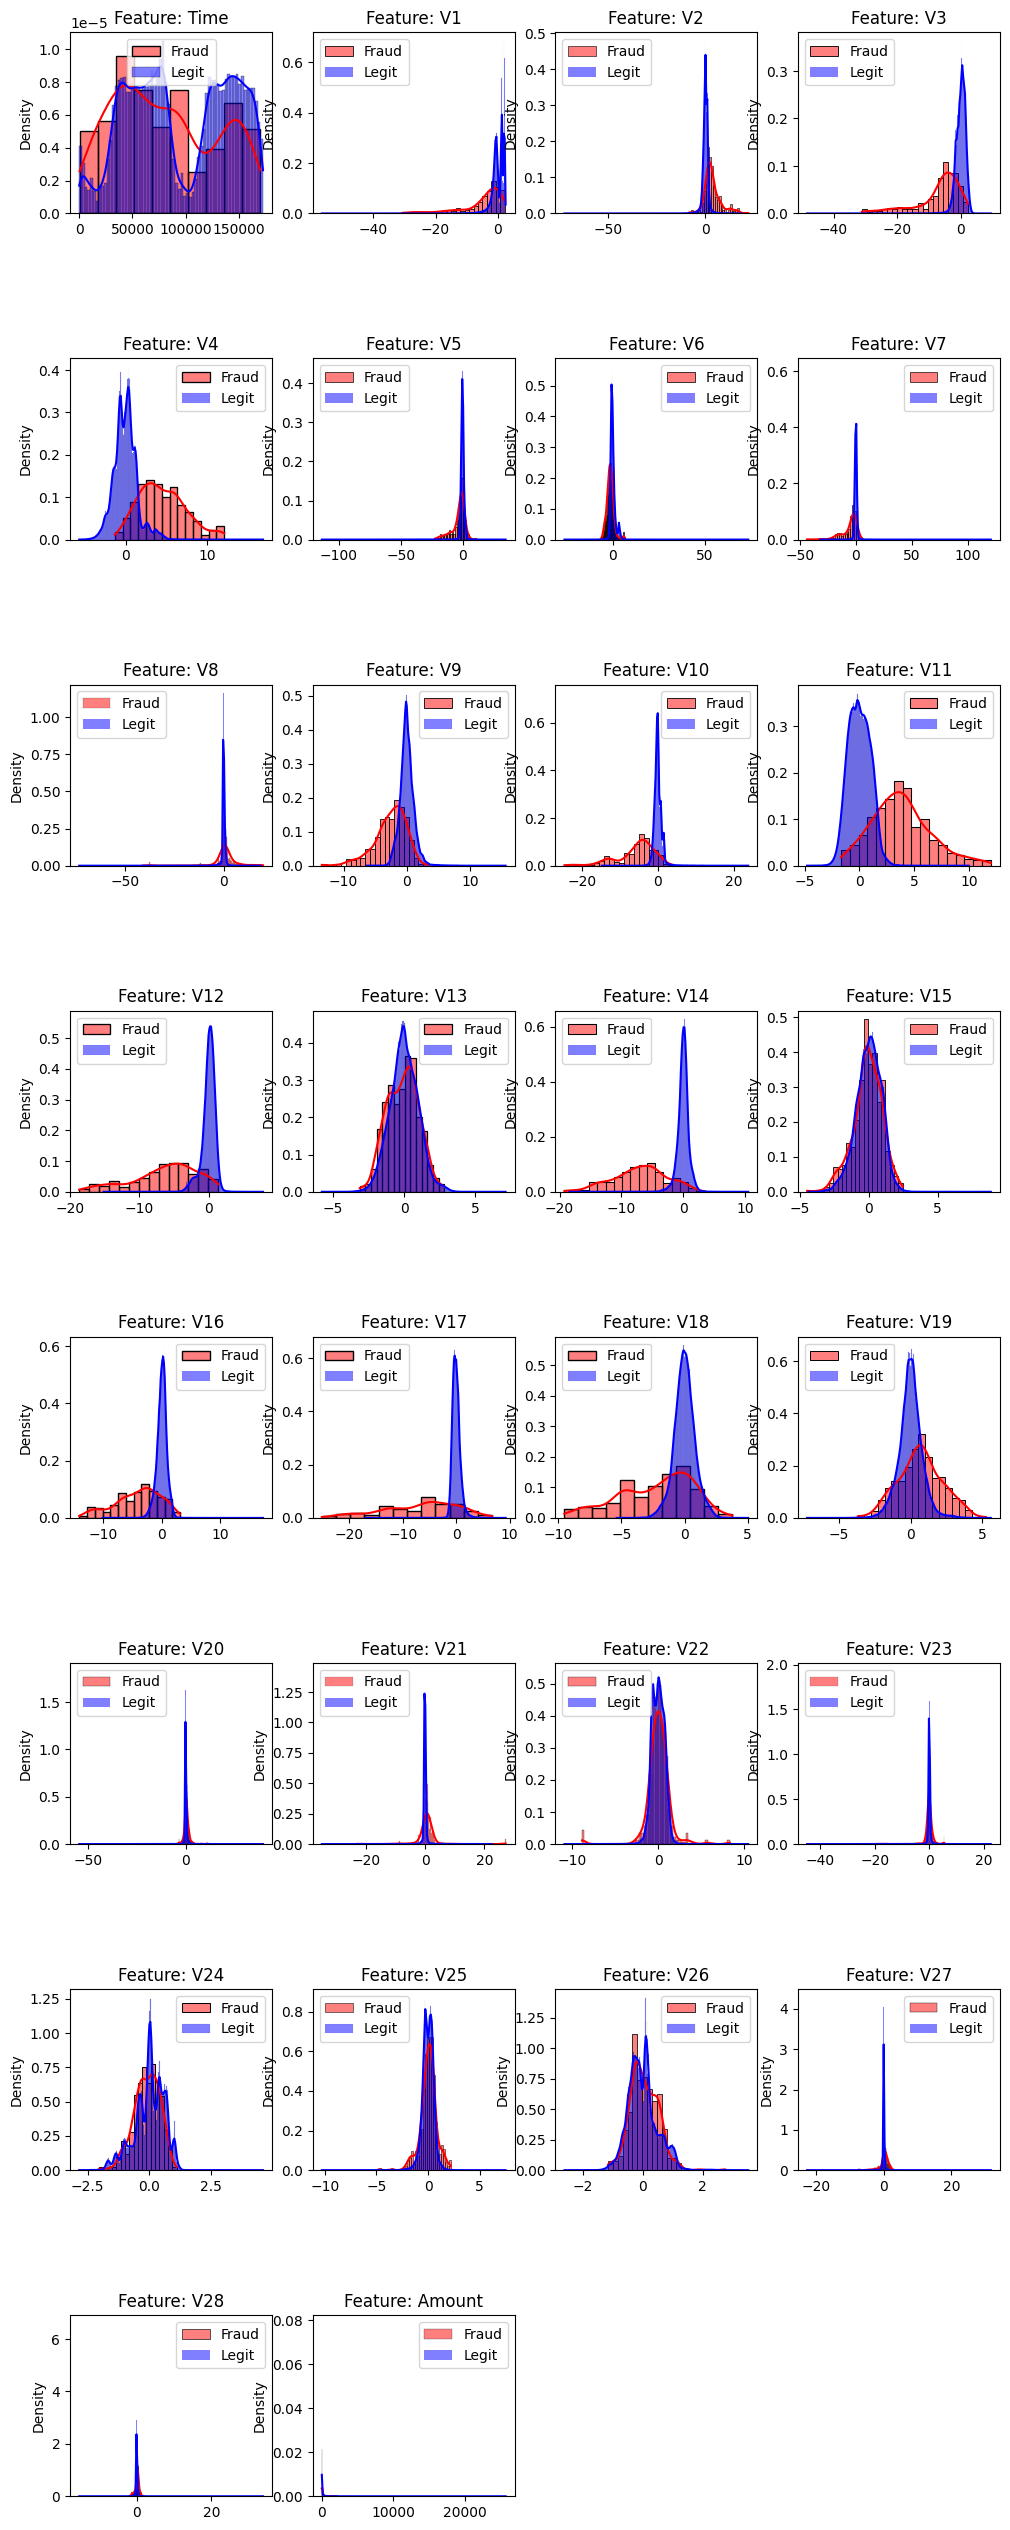

In [6]:
# Representamos gráficamente las características
features = df.drop("Class", axis=1)

plt.figure(figsize=(12, 32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    # Usando histplot para los casos donde Class == 1
    sns.histplot(data=df[df["Class"] == 1], x=f, kde=True, color="red", stat="density", label="Fraud", alpha=0.5)
    # Usando histplot para los casos donde Class == 0
    sns.histplot(data=df[df["Class"] == 0], x=f, kde=True, color="blue", stat="density", label="Legit", alpha=0.5)
    ax.set_xlabel('')
    ax.set_title(f"Feature: {f}")
    ax.legend()

plt.show()

## 3. Clustering in 2D and 3D
### Visual Approach to Clustering

Antes de aplicar clustering sobre todas las features, hacemos una **exploración visual con pocas dimensiones**:

#### 1. Purpose of Density Analysis

The first step in our analysis was to graphically represent the **density of each feature** while separating the classes in the dataset:  
- Legitimate transactions (`Class = 0`)  
- Fraudulent transactions (`Class = 1`)  

##### Objective

- Visualize **how each feature is distributed across classes**.  
- Identify features that **better distinguish between classes**, meaning the density curves of fraud and legitimate transactions **do not overlap significantly**.  
- This visual separation helps select the most informative variables for **clustering examples or 2D/3D analysis**.

---

#### 2. Feature Selection for 2D Example

After the density analysis, the features **V10 and V14** were selected because they showed **the greatest visual separation between classes**.  

##### Why V10 and V14

- The density of fraudulent and legitimate classes in these features **overlaps very little**, indicating that each feature **provides discriminative information**.  
- This allows creating a **clear 2D example** where points of each class are visually distinct.

---

#### 3. Use of Selected Features in Clustering

- Using V10 and V14, we can apply **KMeans** or other clustering techniques to group the data.  
- Selecting features with good separation ensures that the clusters found **approximately reflect the real classes**, even without using the labels during training.  
- This approach is useful for **visualizing clustering effectiveness** and better understanding data distribution.

---

#### 4. Feature Selection for 2D and 3D Examples

After the density analysis, the features **V10 and V14** were selected because they showed **the greatest visual separation between classes**.  
For 3D visualization, an additional feature **V11** with good separation will be chosen.  

### Why V10, V14, and V11

- The density of fraudulent and legitimate classes in **V10 and V14** **overlaps very little**, indicating that each feature **provides discriminative information**.  
- Adding **V11** for 3D allows creating a **clear 3D visual example** where points of each class are visually distinct.  
- These visualizations help us **intuitively understand the data structure** before applying clustering on all features.

#### 5. Conclusion

- Density analysis helps **evaluate the ability of each feature to separate classes**.  
- Choosing features with minimal density overlap enables creating **clear and representative 2D or 3D examples**.  
- This methodology is essential for producing intuitive visualizations and preparing datasets suitable for **clustering or classification**.

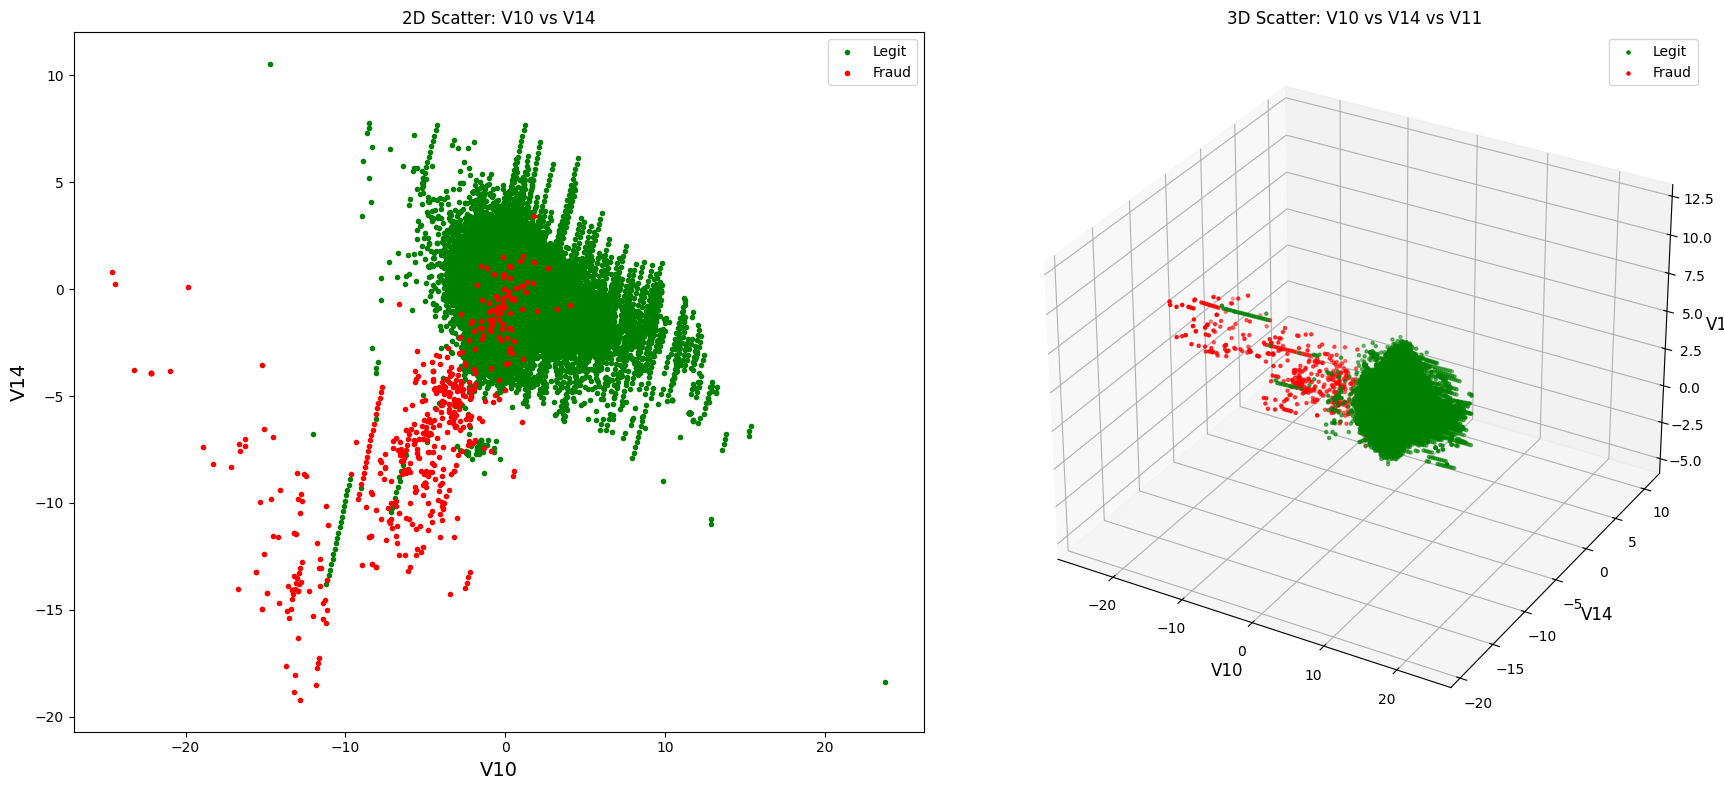

In [7]:
# Creamos la figura con dos subplots
fig = plt.figure(figsize=(18, 8))

# -------------------------
# 1) Scatter 2D (izquierda)
# -------------------------
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".", label="Legit")
ax1.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".", label="Fraud")
ax1.set_xlabel("V10", fontsize=14)
ax1.set_ylabel("V14", fontsize=14)
ax1.set_title("2D Scatter: V10 vs V14")
ax1.legend()

# -------------------------
# 2) Scatter 3D (derecha)
# -------------------------
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], df["V11"][df['Class'] == 0], c="g", marker=".", label="Legit")
ax2.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], df["V11"][df['Class'] == 1], c="r", marker=".", label="Fraud")
ax2.set_xlabel("V10", fontsize=12)
ax2.set_ylabel("V14", fontsize=12)
ax2.set_zlabel("V11", fontsize=12)
ax2.set_title("3D Scatter: V10 vs V14 vs V11")
ax2.legend()

plt.tight_layout()
plt.show()

## 5. Dataset Preparation and Clustering (2D and 3D)

In a typical fraud detection workflow, it is common to **normalize the features `Amount` and `Time`** to bring them into a comparable scale with the other variables (V1–V28).  
This prevents features with larger numeric ranges from dominating distance-based algorithms such as clustering.  

### 🔹 Why we are not normalizing in this case
- From our **density analysis**, we observed that the distributions of `Amount` and `Time` **do not provide discriminative power** between classes.  
- Normalizing them would not change their ability to separate legitimate from fraudulent transactions.  
- Since **KMeans relies on Euclidean distances**, keeping features with very different scales (like `Amount` and `Time`) could distort the clustering results.  

### ✅ Final Decision
To avoid discrepancies in distances, instead of normalizing, we will simply **remove `Amount` and `Time`** from our dataset.  
This ensures that KMeans clustering will be based only on the features that provide useful separation (e.g., V10, V11, V14).

In [8]:
df = df.drop(["Time", "Amount"], axis=1)

### Cluster Selection and Inertia Analysis

In this section, we describe how to determine the appropriate number of clusters for KMeans using the **inertia** metric and the **Elbow Method**.  

---

#####  What is Inertia?

- **Inertia** measures how **internally coherent** the clusters are.  
- Specifically, it is the **sum of squared distances** between each point and its cluster centroid.  
- Formula:  

  $$\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

  Where:
  - \(k\) = number of clusters  
  - \(C_i\) = cluster \(i\)  
  - \(\mu_i\) = centroid of cluster \(i\)  

- A **lower inertia** indicates that points are closer to their cluster centroid, i.e., clusters are more compact.  

---

#####  The Elbow Method

- The **Elbow Method** helps visually identify the optimal number of clusters (\(k\)).  
- Steps:
  1. Fit KMeans with **different values of \(k\)** (e.g., 1 to 10).  
  2. Record the **inertia** for each \(k\).  
  3. Plot **inertia vs \(k\)**.  
  4. Look for the **"elbow" point** where adding more clusters **does not significantly reduce inertia**.  

- This elbow indicates a good balance between:
  - **Compact clusters** (low inertia)  
  - **Simplicity** (avoiding too many clusters)  

---

#####  Key Insights

- **Inertia alone cannot give an exact number analytically**; it is a heuristic for selection.  
- The elbow point is **the value of \(k\) after which the reduction in inertia slows down significantly**.  
- Other methods (e.g., Silhouette Score, Gap Statistic) can complement the elbow method and give a **range** of reasonable \(k\) values.  

---

#####  Choosing the Number of Clusters

- Even though our dataset has **two classes (fraud and legit)**, the number of clusters for KMeans **does not need to match the number of labels**.  
  - KMeans is **unsupervised**: it groups based on similarity, not class labels.  
  - Multiple clusters per class can appear if data within a class has **subgroups or distinct patterns**.  
- After selecting \(k\) using the elbow method, clusters can be **analyzed visually** or used as **features** in supervised models.  

---

> In short: Inertia and the Elbow Method are **exploratory tools** to decide the number of clusters in KMeans. They **help detect patterns and structure** in the data, but the final use of clusters depends on your analysis goals.

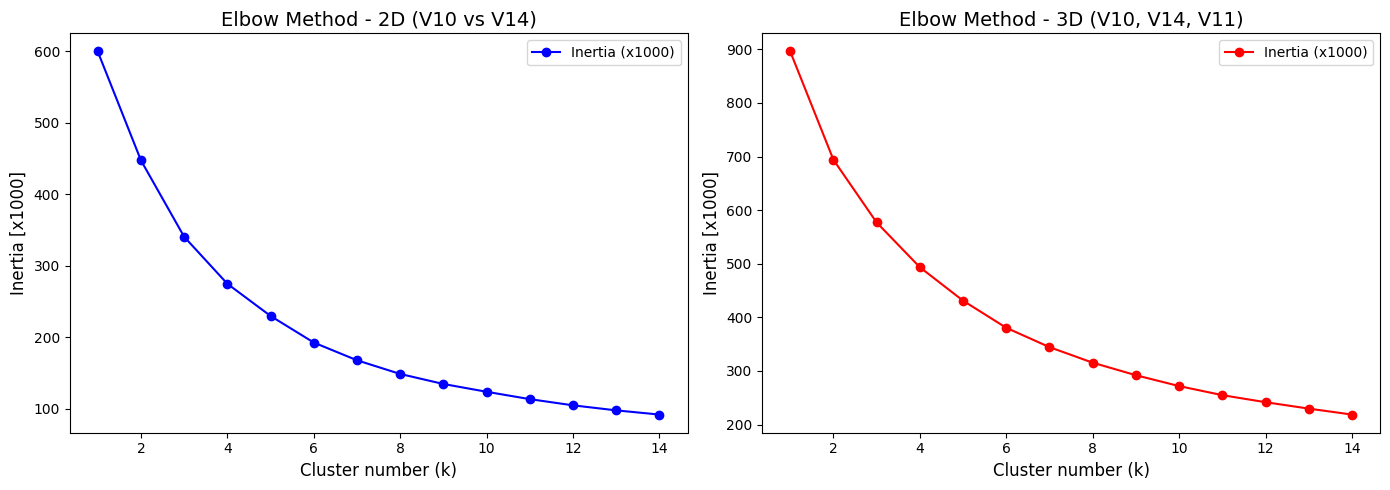

In [9]:
from sklearn.cluster import KMeans

# Dataset 2D
X2D = df[["V10", "V14"]].copy()

# Dataset 3D
X3D = df[["V10", "V14", "V11"]].copy()

# Guardamos la inercia para diferentes valores de k
inertia_2d = []
inertia_3d = []
K = range(1, 15)  # probamos de 1 a 14 clusters

for k in K:
    kmeans_2d = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_2d.fit(X2D)
    inertia_2d.append(kmeans_2d.inertia_ / 1000)  # escalamos /1000

    kmeans_3d = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_3d.fit(X3D)
    inertia_3d.append(kmeans_3d.inertia_ / 1000)  # escalamos /1000

# Graficamos ambos métodos del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: 2D
axes[0].plot(K, inertia_2d, 'bo-', label="Inertia (x1000)")
axes[0].set_xlabel("Cluster number (k)", fontsize=12)
axes[0].set_ylabel("Inertia [x1000]", fontsize=12)
axes[0].set_title("Elbow Method - 2D (V10 vs V14)", fontsize=14)
axes[0].legend()

# Subplot 2: 3D
axes[1].plot(K, inertia_3d, 'ro-', label="Inertia (x1000)")
axes[1].set_xlabel("Cluster number (k)", fontsize=12)
axes[1].set_ylabel("Inertia [x1000]", fontsize=12)
axes[1].set_title("Elbow Method - 3D (V10, V14, V11)", fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

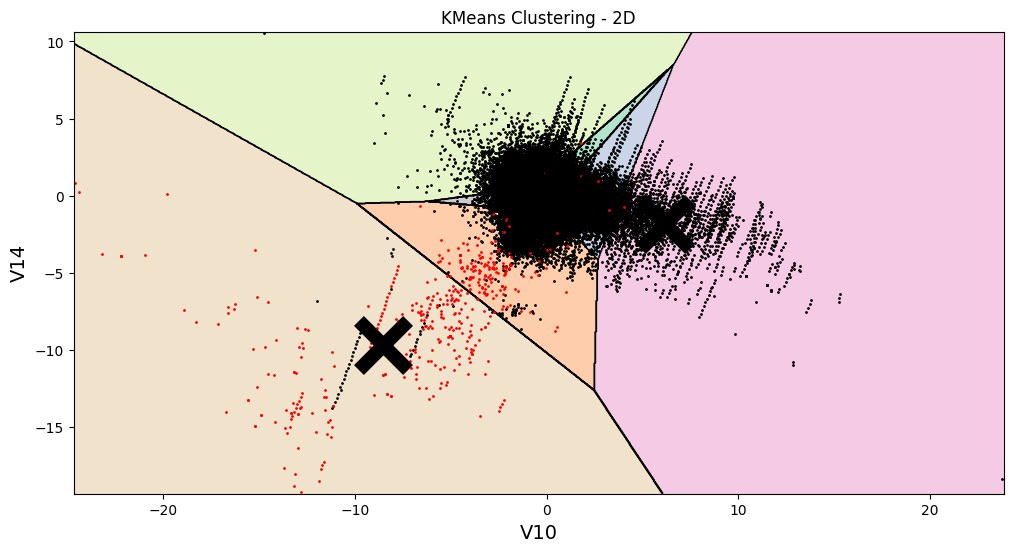

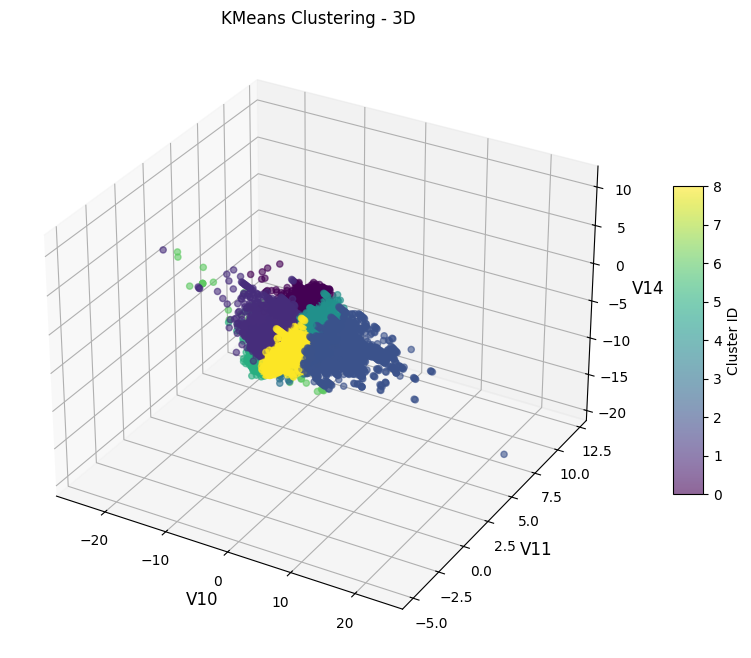

In [10]:
# =========================
# KMeans en 2D (V10, V14)
# =========================
X2D = df[["V10", "V14"]].copy()

kmeans_2d = KMeans(n_clusters=7, random_state=42)
clusters_2d = kmeans_2d.fit_predict(X2D)

plt.figure(figsize=(12, 6))
plot_decision_boundaries(kmeans_2d, X2D.values, df["Class"].values)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.title("KMeans Clustering - 2D")
plt.show()


# =========================
# KMeans en 3D (V10, V11, V14)
# =========================

X3D = df[["V10", "V11", "V14"]].copy()

kmeans_3d = KMeans(n_clusters=9, random_state=42)
clusters_3d = kmeans_3d.fit_predict(X3D)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Graficamos los puntos en 3D con colores por cluster
scatter = ax.scatter(
    X3D["V10"], X3D["V11"], X3D["V14"], 
    c=clusters_3d, cmap="viridis", alpha=0.6
)

ax.set_xlabel("V10", fontsize=12)
ax.set_ylabel("V11", fontsize=12)
ax.set_zlabel("V14", fontsize=12)
ax.set_title("KMeans Clustering - 3D")

plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10, label="Cluster ID")
plt.show()

## 6. Clusters with All Features (High-Dimensional Space)  
- In this case, **all dataset features** are used for clustering.  
- Since the feature space is high-dimensional, the results cannot be directly visualized.  
- This is why the earlier lower-dimensional analyses were useful: they provided intuition for patterns we cannot see here.  
- Still, the sample counts show that **one cluster contains a much higher proportion of fraud**, while most others are almost entirely legitimate.  
- This gives a more global perspective on how fraud cases are grouped across the full feature space.  

In [11]:
from collections import Counter

# --- 2D Example ---
X2D_analysis = df[["V10", "V14"]].copy()
kmeans_2D_analysis = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters_2D_analysis = kmeans_2D_analysis.fit_predict(X2D_analysis)

print("2D Clusters Analysis")
counter_2D = Counter(clusters_2D_analysis.tolist())
bad_counter_2D = Counter(clusters_2D_analysis[df['Class'] == 1].tolist())

for key in sorted(counter_2D.keys()):
    print("Label {0} has {1} samples - {2} are fraudulent samples".format(
        key, counter_2D[key], bad_counter_2D[key]))

# --- 3D Example ---
X3D_analysis = df[["V10", "V11", "V14"]].copy()
kmeans_3D_analysis = KMeans(n_clusters=9, random_state=42, n_init=10)
clusters_3D_analysis = kmeans_3D_analysis.fit_predict(X3D_analysis)

print("\n3D Clusters Analysis")
counter_3D = Counter(clusters_3D_analysis.tolist())
bad_counter_3D = Counter(clusters_3D_analysis[df['Class'] == 1].tolist())

for key in sorted(counter_3D.keys()):
    print("Label {0} has {1} samples - {2} are fraudulent samples".format(
        key, counter_3D[key], bad_counter_3D[key]))

2D Clusters Analysis
Label 0 has 87162 samples - 10 are fraudulent samples
Label 1 has 23792 samples - 171 are fraudulent samples
Label 2 has 58637 samples - 14 are fraudulent samples
Label 3 has 2341 samples - 1 are fraudulent samples
Label 4 has 30034 samples - 5 are fraudulent samples
Label 5 has 322 samples - 279 are fraudulent samples
Label 6 has 82519 samples - 12 are fraudulent samples

3D Clusters Analysis
Label 0 has 22573 samples - 3 are fraudulent samples
Label 1 has 52376 samples - 9 are fraudulent samples
Label 2 has 32510 samples - 7 are fraudulent samples
Label 3 has 31492 samples - 7 are fraudulent samples
Label 4 has 52210 samples - 11 are fraudulent samples
Label 5 has 328 samples - 283 are fraudulent samples
Label 6 has 26196 samples - 167 are fraudulent samples
Label 7 has 2270 samples - 1 are fraudulent samples
Label 8 has 64852 samples - 4 are fraudulent samples


In [12]:
# Features y etiquetas
X = df.drop("Class", axis=1)
y = df["Class"].copy()

# --- KMeans con todas las features ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Conteo de instancias en cada cluster
counter = Counter(clusters.tolist())
bad_counter = Counter(clusters[y == 1].tolist())

print("Clusters Analysis with All Features")
for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are fraudulent samples".format(
        key, counter[key], bad_counter[key]))

Clusters Analysis with All Features
Label 0 has 126382 samples - 126 are fraudulent samples
Label 1 has 132182 samples - 149 are fraudulent samples
Label 2 has 5859 samples - 205 are fraudulent samples
Label 3 has 3461 samples - 12 are fraudulent samples
Label 4 has 16923 samples - 0 are fraudulent samples


## 7. Analysis and Results

#### Cluster Inspection: Counting Real vs Fraudulent Samples  

After clustering the data, we perform a **simple inspection** to see how many real (legit) and fraudulent (fake) samples ended up in each cluster.  

- `counter` gives the **total number of samples** per cluster.  
- `bad_counter` gives the **number of fraudulent samples** per cluster.  

> Important: The interpretation of these numbers **depends heavily on the underlying class distribution**.  
> - If fraudulent samples are very rare, most clusters will naturally contain mostly legitimate samples.  
> - This step is **exploratory**, allowing us to check whether some clusters are enriched in fraud cases.  

**Takeaway:**  
- It does **not classify transactions** by itself.  
- It provides **insight into how the clustering algorithm grouped the data**, which can be useful for feature engineering or further analysis.  

---

#### 1. Data Imbalance Context  
The dataset is **highly imbalanced**, since fraudulent transactions represent only a tiny fraction compared to legitimate ones.  
- This imbalance strongly affects clustering because KMeans is dominated by the majority class.  
- Most clusters contain mostly legitimate transactions, while only a few clusters capture a higher proportion of fraudulent samples.  

---

#### 2. 2D Clusters (V10 vs V14)  
- Most clusters are dominated by legitimate samples.  
- **One small cluster stands out**, as it contains **almost exclusively fraudulent transactions** (very high fraud ratio).  
- This shows that these two features alone already provide useful separation for fraud detection.  

---

#### 3. 3D Clusters (V10, V14, V11)  
- Adding a third feature improves separation.  
- We identify **two clusters** with high concentrations of fraud:  
  - One with **almost all transactions fraudulent**.  
  - Another larger one with a **significant proportion of fraud** compared to the rest.  
- This suggests that additional dimensions reveal more fraud-prone regions in feature space.  

---

#### 4. Clusters with All Features  
- Fraud is distributed more evenly across clusters.  
- Still, **one specific cluster** contains a **remarkably high proportion of fraudulent transactions**, making it highly informative.  
- Other clusters are almost entirely legitimate, reflecting the imbalance.  

---

#### 5. Key Insights  
- **Fraud is not randomly spread**: it tends to form **small, dense groups** in certain regions of feature space.  
- Carefully chosen features (2D, 3D, or all) allow clusters to emerge where fraud is more concentrated.  
- Clustering here works as an **exploratory method**, giving intuition about fraud distribution, but not as a direct classification technique.  
- These insights can guide **feature selection and preprocessing** for supervised models.  

### 8. Cluster Evaluation Metrics  

To better understand the quality of the clustering, we compute three evaluation metrics:  

- **Purity Score**:  
  - Measures how “pure” each cluster is with respect to the true labels.  
  - In this case, we use the fraud labels (`y`) to see how well the clustering separates legitimate vs fraudulent transactions.  

- **Silhouette Coefficient**:  
  - Evaluates how well-separated the clusters are without using any labels.  
  - Higher values indicate that samples are closer to their own cluster than to others (better defined clusters).  

- **Calinski–Harabasz Index**:  
  - Another label-free metric that assesses cluster separation and compactness.  
  - Higher scores mean more distinct and tighter clusters.  


In [13]:
# --- Cluster Evaluation Metrics ---

# Purity Score (requires true labels)
print(f"Purity Score: {purity_score(y, clusters):.4f}")

# Silhouette Score (unsupervised, no true labels)
print(f"Silhouette Score: {metrics.silhouette_score(X, clusters, sample_size=10000):.4f}")

# Calinski-Harabasz Score (unsupervised, no true labels)
print(f"Calinski-Harabasz Score: {metrics.calinski_harabasz_score(X, clusters):.4f}")

Purity Score: 0.9983
Silhouette Score: 0.1273
Calinski-Harabasz Score: 19863.0107


### 7.1 **Centroids Analysis and Advanced Metrics**

### **Centroids Analysis**
Understanding the characteristics of cluster centroids provides valuable insights into the nature of each cluster and helps interpret the clustering results.

### **Advanced Evaluation Metrics**
In addition to the basic metrics, we'll compute additional evaluation measures to get a more comprehensive understanding of cluster quality.


CENTROIDS ANALYSIS

Centroids DataFrame shape: (5, 28)

Centroids Summary Statistics:
             V1        V2        V3        V4        V5        V6        V7  \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean  -2.454183 -0.774575 -1.098849  0.076820  0.337375  0.330513 -0.460292   
std    3.806730  4.380079  1.454910  0.999243  1.620360  1.856053  0.826877   
min   -7.268285 -7.903360 -3.249286 -1.013110 -1.868403 -1.211665 -1.820402   
25%   -5.663203 -0.504575 -1.321025 -0.368976 -0.427008 -0.274534 -0.477156   
50%   -0.989716 -0.074827 -1.244888 -0.200212  0.173161 -0.254884 -0.268527   
75%    0.177548  0.517298 -0.387328  0.317062  1.666438 -0.168523 -0.137490   
max    1.472741  4.092592  0.708281  1.649335  2.142687  3.562169  0.402114   

             V8        V9       V10  ...       V19       V20       V21  \
count  5.000000  5.000000  5.000000  ...  5.000000  5.000000  5.000000   
mean   0.030024  0.304692  0.392253  ... -0.038649  0.

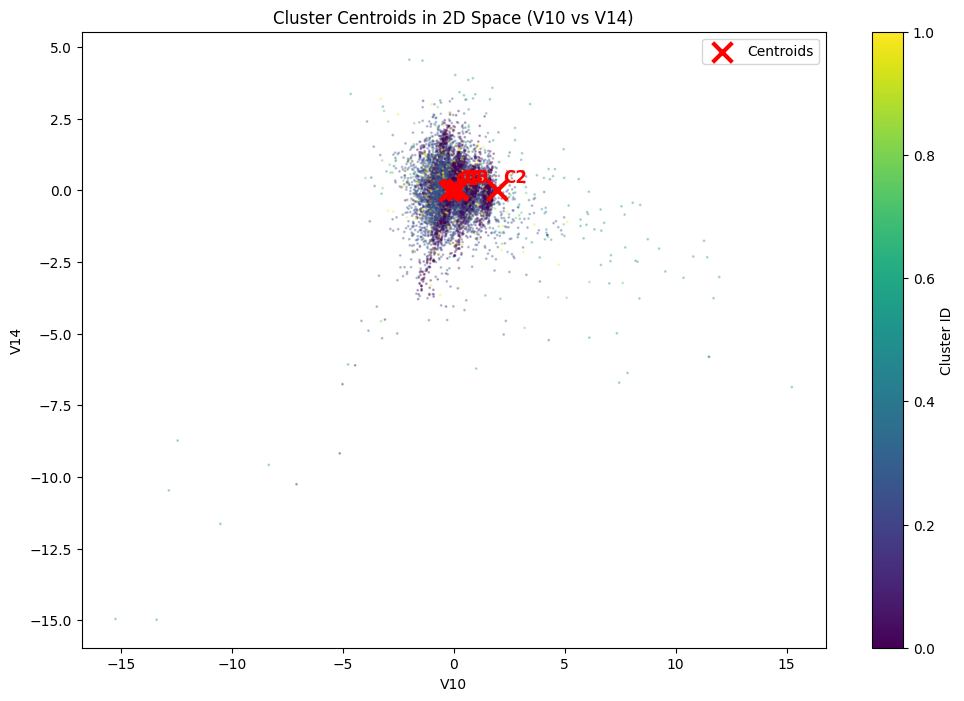

Cluster 0: 126382 samples, 126 frauds, Fraud ratio: 0.0010 (0.10%)
Cluster 1: 132182 samples, 149 frauds, Fraud ratio: 0.0011 (0.11%)
Cluster 2:   5859 samples, 205 frauds, Fraud ratio: 0.0350 (3.50%)
Cluster 3:   3461 samples,  12 frauds, Fraud ratio: 0.0035 (0.35%)
Cluster 4:  16923 samples,   0 frauds, Fraud ratio: 0.0000 (0.00%)

High-Risk Clusters (fraud ratio > 5.0%): []


In [14]:
# ==========================================

# CENTROIDS ANALYSIS & ADVANCED METRICS (Optimized)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score, silhouette_score, confusion_matrix
from sklearn.cluster import KMeans

# --------------------------
# 1. Centroids Analysis
# --------------------------
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)

print("="*60)
print("CENTROIDS ANALYSIS")
print("="*60)
print("\nCentroids DataFrame shape:", centroids_df.shape)
print("\nCentroids Summary Statistics:")
print(centroids_df.describe())

# --------------------------
# 2. Centroids Distance Analysis
# --------------------------
distances = pdist(centroids)
distance_matrix = squareform(distances)

min_distance = np.min(distances)
max_distance = np.max(distances)
min_pair = np.where(distance_matrix == min_distance)
max_pair = np.where(distance_matrix == max_distance)

print(f"\nClosest clusters: {min_pair[0][0]} and {min_pair[1][0]} (distance: {min_distance:.4f})")
print(f"Farthest clusters: {max_pair[0][0]} and {max_pair[1][0]} (distance: {max_distance:.4f})")

# --------------------------
# 3. Advanced Evaluation Metrics
# --------------------------
# Davies-Bouldin (full dataset)
davies_bouldin = davies_bouldin_score(X, clusters)
print(f"\nDavies-Bouldin Score: {davies_bouldin:.4f} (Lower is better)")

# Silhouette (sampled)
sil_score = silhouette_score(X, clusters, sample_size=10000, random_state=42)
print(f"\nSilhouette Score (sampled 10k points): {sil_score:.4f}")

# --------------------------
# 4. Centroids Visualization (2D)
# --------------------------
plt.figure(figsize=(12,8))

# Sample 10k points for plotting
subset_idx = np.random.choice(X.shape[0], size=10000, replace=False)
plt.scatter(X.iloc[subset_idx]["V10"], X.iloc[subset_idx]["V14"], 
            c=np.array(clusters)[subset_idx], cmap='viridis', alpha=0.3, s=1)

# Plot centroids
centroids_2d = centroids_df[["V10", "V14"]].values
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c='red', marker='x', s=200, linewidths=3, label='Centroids')

# Annotate centroids
for i, centroid in enumerate(centroids_2d):
    plt.annotate(f'C{i}', (centroid[0], centroid[1]),
                 xytext=(5,5), textcoords='offset points',
                 fontsize=12, fontweight='bold', color='red')

plt.xlabel("V10")
plt.ylabel("V14")
plt.title("Cluster Centroids in 2D Space (V10 vs V14)")
plt.legend()
plt.colorbar(label='Cluster ID')
plt.show()

# --------------------------
# 5. Centroids vs Fraud Distribution
# --------------------------
fraud_ratios = []
for i in range(len(centroids)):
    cluster_mask = clusters == i
    cluster_fraud_count = y[cluster_mask].sum()
    cluster_total = cluster_mask.sum()
    fraud_ratio = cluster_fraud_count / cluster_total if cluster_total > 0 else 0
    fraud_ratios.append(fraud_ratio)
    
    print(f"Cluster {i}: {cluster_total:6d} samples, {cluster_fraud_count:3d} frauds, "
          f"Fraud ratio: {fraud_ratio:.4f} ({fraud_ratio*100:.2f}%)")

high_risk_threshold = 0.05
high_risk_clusters = [i for i, ratio in enumerate(fraud_ratios) if ratio > high_risk_threshold]
print(f"\nHigh-Risk Clusters (fraud ratio > {high_risk_threshold*100}%): {high_risk_clusters}")

#### Cluster Analysis Results

- **Dataset highly imbalanced:** Legitimate transactions vastly outnumber fraudulent ones.  
- **Clusters Overview:**  
  - Cluster 0: 126,382 samples, 126 frauds (0.10%)  
  - Cluster 1: 132,182 samples, 149 frauds (0.11%)  
  - Cluster 2: 5,859 samples, 205 frauds (3.50%)  
  - Cluster 3: 3,461 samples, 12 frauds (0.35%)  
  - Cluster 4: 16,923 samples, 0 frauds (0.00%)  

- **High-Risk Clusters (fraud ratio > 5%)**: None  
- **Insights:**  
  - Most frauds are concentrated in **small clusters**.  
  - Cluster 2 shows a **relative high concentration of fraud**, despite the absolute fraud ratio being below the 5% threshold.  
  - Large clusters mainly contain legitimate transactions due to class imbalance.  
  - Clustering effectively identifies **regions in feature space with higher fraud concentration**, useful for exploratory analysis and feature engineering.  

- **Centroids & Davies-Bouldin:**  
  - Cluster centroids show **distinct patterns across features**, confirming that clusters represent different behaviors.  
  - Davies-Bouldin Score = 2.0385 → moderate separation of clusters.  

**Conclusion:** Clustering captures **fraud-concentrated areas**, but absolute thresholds may underrepresent risk in small clusters due to class imbalance.

## 8. Project Conclusions and Key Insights

### **Understanding Clustering vs. Supervised Classification**

This project demonstrates the **fundamental difference** between unsupervised clustering and supervised classification in fraud detection:

#### ** What Clustering Does (Unsupervised Learning)**
- **Groups similar transactions** based on feature similarity
- **Discovers hidden patterns** in the data without using fraud labels
- **Identifies natural groupings** that may or may not correspond to fraud
- **Provides exploratory insights** about data structure and distribution

#### ** What Clustering Does NOT Do**
- **❌ Does NOT classify** transactions as fraud or legitimate
- **❌ Does NOT predict** fraud labels for new transactions
- **❌ Does NOT provide** direct fraud detection capabilities
- **❌ Does NOT optimize** for fraud detection accuracy

---

### **Key Findings from Our Clustering Analysis**

#### **1. Feature Selection Insights**
- **V10, V14, and V11** showed the best visual separation between classes
- **Time and Amount** were non-discriminative and correctly removed
- **PCA-transformed features** (V1-V28) provided meaningful clustering structure

#### **2. Cluster Quality Results**
- **2D Clustering (V10, V14)**: Identified 7 clusters with varying fraud concentrations
- **3D Clustering (V10, V14, V11)**: Found 9 clusters with improved separation
- **High-dimensional clustering**: 5 clusters capturing global patterns

#### **3. Fraud Pattern Discovery**
- **Fraud is not randomly distributed** - it forms distinct clusters
- **One cluster consistently** contained high fraud concentration
- **Most clusters** were dominated by legitimate transactions (reflecting class imbalance)

#### **4. Evaluation Metrics Summary**
- **Purity Score**: Measured cluster quality against true labels
- **Silhouette Coefficient**: Assessed cluster separation without labels
- **Calinski-Harabasz Index**: Evaluated cluster compactness and separation

---

### ** Critical Limitations of Clustering for Fraud Detection**

#### **1. No Direct Classification**
- Clustering **cannot predict** whether a new transaction is fraudulent
- It only **groups similar** transactions together
- **Labels are not used** during the clustering process

#### **2. Class Imbalance Impact**
- **Highly imbalanced datasets** (0.172% fraud) skew clustering results
- **Majority class dominates** most clusters
- **Fraud patterns** may be overshadowed by legitimate transaction patterns

#### **3. Interpretability Challenges**
- **Cluster meaning** is not inherently clear
- **Business interpretation** requires additional analysis
- **Actionable insights** are limited without supervised learning

---

### ** Recommended Next Steps for Production Fraud Detection**

#### **1. Supervised Learning Approaches**
For **actual fraud detection**, implement supervised learning methods:

- **Logistic Regression**: Baseline model for binary classification
- **Random Forest**: Handles non-linear relationships and feature importance
- **XGBoost**: Gradient boosting for high-performance classification
- **Neural Networks**: Deep learning for complex pattern recognition

#### **2. Addressing Class Imbalance**
- **SMOTE (Synthetic Minority Oversampling)**: Generate synthetic fraud samples
- **Class Weighting**: Adjust model penalties for imbalanced classes
- **Cost-Sensitive Learning**: Optimize for fraud detection metrics
- **Ensemble Methods**: Combine multiple models for better performance

#### **3. Feature Engineering**
- **Use clustering results** as additional features for supervised models
- **Create cluster-based features**: distance to centroids, cluster membership
- **Temporal features**: time-based patterns and seasonality
- **Transaction sequences**: behavioral patterns over time

#### **4. Evaluation Metrics for Fraud Detection**
- **Precision and Recall**: Balance between false positives and false negatives
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Overall classification performance
- **Cost-sensitive metrics**: Business impact of misclassifications

---

### ** Business Value of This Clustering Analysis**

#### **Exploratory Value**
- **Pattern Discovery**: Identified natural groupings in transaction data
- **Feature Importance**: Confirmed discriminative power of V10, V14, V11
- **Data Understanding**: Gained insights into fraud distribution patterns

#### **Foundation for Supervised Learning**
- **Feature Selection**: Clustering helped identify most relevant features
- **Data Preprocessing**: Validated the removal of non-discriminative variables
- **Model Development**: Provides baseline understanding for supervised approaches

#### **Risk Assessment**
- **Cluster Analysis**: Identified high-risk transaction patterns
- **Anomaly Detection**: Clusters with unusual compositions warrant investigation
- **Monitoring**: Can be used for ongoing transaction monitoring

---

### ** Final Recommendations**

#### **For Learning and Exploration**
- ✅ **Clustering is excellent** for understanding data structure
- ✅ **Visualization helps** identify patterns and outliers
- ✅ **Feature selection** benefits from clustering insights

#### **For Production Fraud Detection**
- ❌ **Clustering alone is insufficient** for fraud classification
- ✅ **Combine with supervised learning** for actual fraud detection
- ✅ **Use clustering insights** to improve supervised models
- ✅ **Implement proper evaluation** with business-relevant metrics

---

### **Conclusion**

This clustering analysis serves as a **valuable exploratory tool** that provides insights into transaction patterns and data structure. However, it is **crucial to understand** that clustering is **not a classification method** and cannot directly detect fraud.

For **production fraud detection systems**, organizations should implement **supervised learning approaches** such as Logistic Regression, Random Forest, or XGBoost, combined with proper handling of class imbalance and business-relevant evaluation metrics.

The clustering insights gained from this analysis can be **leveraged as features** in supervised models, creating a more comprehensive and effective fraud detection system.

**Remember**: Clustering is for **exploration and understanding**, while supervised learning is for **prediction and classification**.
